In [24]:
# imports
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim

print("the torch version is {}".format(torch.__version__))

the torch version is 1.6.0


In [3]:
# import the image data
scratch_dir = "/home/javaprog/Data/Personal/Scratch/"
cifar10 = datasets.CIFAR10(scratch_dir, train=True, download=True)
cifar10_validation = datasets.CIFAR10(scratch_dir, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# print the method resolution order of the dataset
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [5]:
# get the length of the dataset
len(cifar10)

50000

In [6]:
# get the class names
class_names = cifar10.classes

In [7]:
# print an image
index = 77
image, label = cifar10[index]
image, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5E268B7320>, 0, 'airplane')

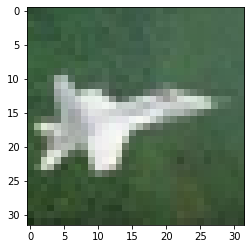

In [8]:
# print the images
plt.imshow(image)
plt.show()

In [9]:
# list the transforms
dir(transforms)


['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [10]:
# input the image into a tensor
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image)
print("the image tensor shpw is {}".format(image_tensor.shape))


the image tensor shpw is torch.Size([3, 32, 32])


In [11]:
# reload cifar10 into tensor format
cifar10_tensor = datasets.CIFAR10(scratch_dir, train=True, download=False, transform=transforms.ToTensor())
print("the dataset length is {}".format(len(cifar10_tensor)))


the dataset length is 50000


In [12]:
# get the image from the tensored dataset
image_tensored, label = cifar10_tensor[index]
print("the tensored image at index {} is of shape {} and type {} and datatype {}".format(index, image_tensored.shape, type(image_tensored), image_tensored.dtype))

the tensored image at index 77 is of shape torch.Size([3, 32, 32]) and type <class 'torch.Tensor'> and datatype torch.float32


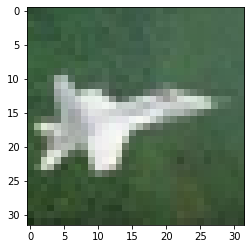

In [13]:
# print the new image
# NOTE: need to flip matrix from C/H/W to H/W/C
plt.imshow(image_tensored.permute(1, 2, 0))
plt.show()

In [14]:
# load all the images into a batch tensor
images_stacked = torch.stack([image_temp for image_temp, _ in cifar10_tensor], dim=3)
print("the stacked images are of type {} and shape {}".format(type(images_stacked), images_stacked.shape))

the stacked images are of type <class 'torch.Tensor'> and shape torch.Size([3, 32, 32, 50000])


In [15]:
# build a tensor to compute the mean and std
images_calc = images_stacked.view(3, -1)
print("the stacked mean/std images are of type {} and shape {}".format(type(images_calc), images_calc.shape))

the stacked mean/std images are of type <class 'torch.Tensor'> and shape torch.Size([3, 51200000])


In [16]:
# get the mean and std tensors
images_mean = images_calc.mean(dim=1)
images_std = images_calc.std(dim=1)
print("the mean tensor is {}".format(images_mean))
print("the std tensor is {}".format(images_std))
print("the mean numpy is {}".format(images_mean.numpy()))
print("the std numpy is {}".format(images_std.numpy()))

the mean tensor is tensor([0.4915, 0.4823, 0.4468])
the std tensor is tensor([0.2470, 0.2435, 0.2616])
the mean numpy is [0.49147    0.48226798 0.44678035]
the std numpy is [0.24703224 0.24348514 0.26158786]


In [17]:
# reload the tensor images normalized
cifar10_normalized = datasets.CIFAR10(scratch_dir, train=True, download=False, 
                        transform=transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(images_mean, images_std)]))
print("the normalized images are of length {}".format(len(cifar10_normalized)))


the normalized images are of length 50000


In [31]:
# reload the tensor images validation normalized
cifar10_normalized_val = datasets.CIFAR10(scratch_dir, train=False, download=False, 
                        transform=transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(images_mean, images_std)]))
print("the normalized validation images are of length {}".format(len(cifar10_normalized_val)))

the normalized validation images are of length 10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


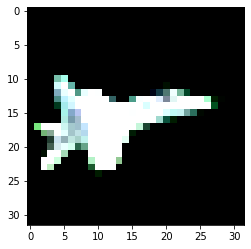

In [18]:
# print the transformad sample image
image_normalized, label = cifar10_normalized[index]
plt.imshow(image_normalized.permute(1, 2, 0))
plt.show()


In [19]:
# print the classes
print("the class names are {}".format(class_names))

the class names are ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [34]:
# filter down to deer and ship
bi_label_map = {4:0, 9:1}
bi_class_names = [class_names[4], class_names[9]]
print("the binary classes are {}".format(bi_class_names))

the binary classes are ['deer', 'truck']


In [35]:
# create binary dataset
cifar10_binary = [(temp_image, bi_label_map[label]) for temp_image, label in cifar10_normalized if label in [4, 9]]
cifar10_binary_val = [(temp_image, bi_label_map[label]) for temp_image, label in cifar10_normalized_val if label in [4, 9]]
print("got binary dataset for training of size {} and validation dataset of size {}".format(len(cifar10_binary), len(cifar10_binary_val)))

got binary dataset for training of size 10000 and validation dataset of size 2000


In [26]:
# build an NN class
class OneHiddenLayerLinear(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear_01_input = nn.Linear(input_size, 512)
        self.linear_01_activation = nn.Tanh()
        self.linear_02_output = nn.Linear(512, 2)
        self.linear_02_activation = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # input
        x = self.linear_01_input(x)
        x = self.linear_01_activation(x)

        # output
        x = self.linear_02_output(x)
        x = self.linear_02_activation(x)

        # return
        return x

one_hidden_model = OneHiddenLayerLinear(3072)


In [36]:
# first set the trining parameters
batch_size = 32
learning_rate = 1e-2
number_epochs = 100

# create the data loader
train_loader = data.DataLoader(cifar10_binary, batch_size=batch_size, shuffle=True)

# create the optimizer
optimizer = optim.SGD(one_hidden_model.parameters(), lr=learning_rate)
loss_function = nn.NLLLoss()


In [38]:
# train the network
for epoch in range(number_epochs):
    for temp_images, labels in train_loader:
        temp_size = temp_images.shape[0]
        outputs = one_hidden_model(temp_images.view(temp_size, -1))
        loss = loss_function(outputs, labels)

        # backward gradient
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # print data for each epoch
    print("Epoch: {} with loss {:f}".format(epoch, loss))



Epoch: 0 with loss 0.378377
Epoch: 1 with loss 0.231499
Epoch: 2 with loss 0.377588
Epoch: 3 with loss 0.278362
Epoch: 4 with loss 0.101231
Epoch: 5 with loss 0.250191
Epoch: 6 with loss 0.080457
Epoch: 7 with loss 0.817244
Epoch: 8 with loss 0.267916
Epoch: 9 with loss 0.354970
Epoch: 10 with loss 0.132373
Epoch: 11 with loss 0.083830
Epoch: 12 with loss 0.121316
Epoch: 13 with loss 0.214417
Epoch: 14 with loss 0.030490
Epoch: 15 with loss 0.092587
Epoch: 16 with loss 0.122803
Epoch: 17 with loss 0.067050
Epoch: 18 with loss 0.050180
Epoch: 19 with loss 0.066054
Epoch: 20 with loss 0.061560
Epoch: 21 with loss 0.119069
Epoch: 22 with loss 0.021738
Epoch: 23 with loss 0.017373
Epoch: 24 with loss 0.043797
Epoch: 25 with loss 0.014938
Epoch: 26 with loss 0.014274
Epoch: 27 with loss 0.007880
Epoch: 28 with loss 0.022589
Epoch: 29 with loss 0.020997
Epoch: 30 with loss 0.006959
Epoch: 31 with loss 0.018681
Epoch: 32 with loss 0.038165
Epoch: 33 with loss 0.004243
Epoch: 34 with loss 0.00

In [41]:
# validate the model
validation_loader = data.DataLoader(cifar10_binary_val, batch_size=batch_size, shuffle=False)
number_correct = 0
number_total = 0

with torch.no_grad():
    for temp_images, labels in validation_loader:
        temp_size = temp_images.shape[0]
        outputs = one_hidden_model(temp_images.view(temp_size, -1))
        # print("outputs is of type {} and shape {}".format(type(outputs), outputs.shape))
        _, prediction = torch.max(outputs, dim=1)
        number_total += labels.shape[0]
        number_correct += int((prediction == labels).sum())

print("the model accuracy is {:f}".format(number_correct/number_total))


outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([32, 2])
outputs is of type <class 'torch.Tensor'> and shape torch.Size([